In [8]:
import pandas as pd

# Load your historical sales data into a DataFrame
# Attempt to read the file with ISO-8859-1 encoding
data = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset to understand its structure
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
# Convert 'InvoiceDate' to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Check the range of dates in the dataset
date_range = data['InvoiceDate'].min(), data['InvoiceDate'].max()
date_range

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

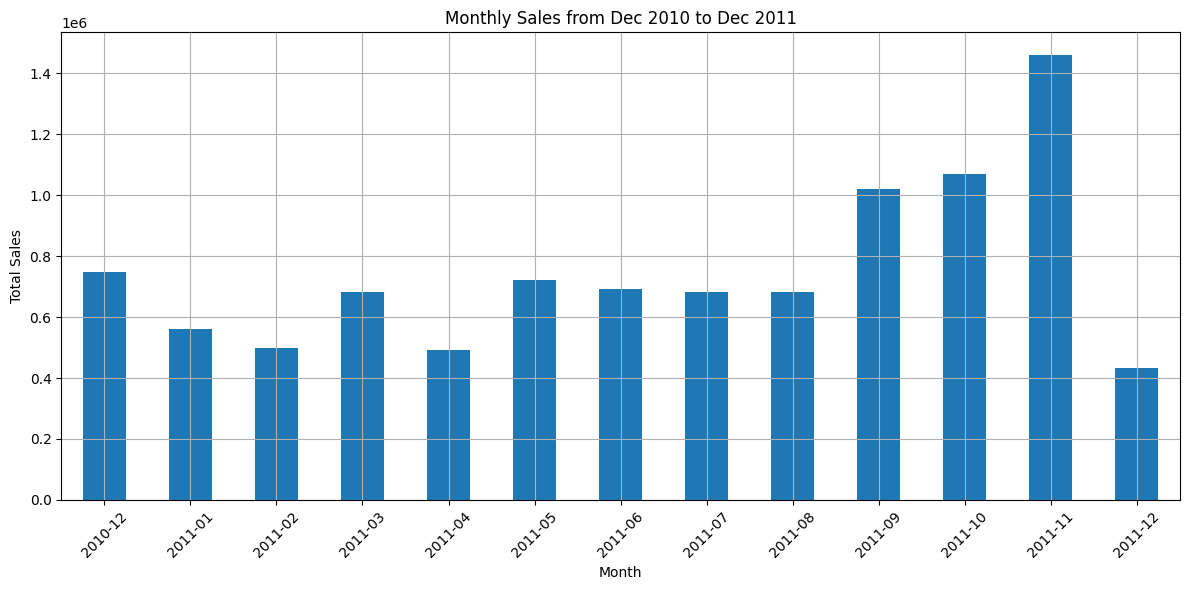

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 'TotalPrice' column for total price per item per transaction
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Extract year and month for seasonal analysis
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

# Aggregate total sales per month
monthly_sales = data.groupby('YearMonth')['TotalPrice'].sum()

# Plotting the monthly sales to observe seasonal patterns
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales from Dec 2010 to Dec 2011')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/gk/17pkq0j93bl97l2zq6qg33j40000gn/T/ipykernel_86218/1360367360.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_data = data.resample('W', on='InvoiceDate').sum()['TotalPrice']
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12138D+01    |proj g|=  1.32508D-01

At iterate    5    f=  1.11230D+01    |proj g|=  1.32104D-02

At iterate   10    f=  1.11193D+01    |proj g|=  6.63471D-03

At iterate   15    f=  1.11190D+01    |proj g|=  6.45794D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     21      1     0     0   6.458D-06   1.112D+01
  F =   11.118966479631110     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


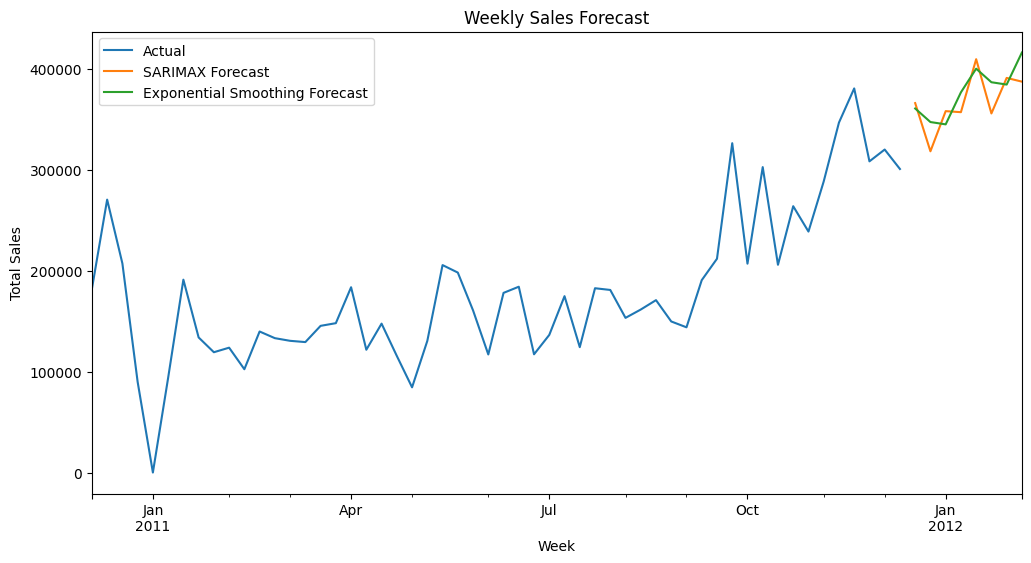

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

# For better decomposition, let's consider a shorter period, e.g., weekly data
weekly_data = data.resample('W', on='InvoiceDate').sum()['TotalPrice']

# Decomposition of weekly data (this time we use weekly to get enough data points)
decomposition_weekly = seasonal_decompose(weekly_data, model='additive', period=4)  # Assuming a 4-week cycle

# ARIMA Model: Using the auto_arima results from earlier for monthly data
# SARIMAX (Seasonal ARIMA) is more appropriate for seasonal data
sarimax_model = SARIMAX(weekly_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
sarimax_result = sarimax_model.fit()

# Exponential Smoothing Model
exp_smooth_model = ExponentialSmoothing(weekly_data, trend='add', seasonal='add', seasonal_periods=4)
exp_smooth_result = exp_smooth_model.fit()

# Forecasting the next 8 weeks (to cover May and June)
sarimax_forecast = sarimax_result.forecast(steps=8)
exp_smooth_forecast = exp_smooth_result.forecast(steps=8)

# Plotting the forecasts
plt.figure(figsize=(12, 6))
weekly_data.plot(label='Actual', legend=True)
sarimax_forecast.plot(label='SARIMAX Forecast', legend=True)
exp_smooth_forecast.plot(label='Exponential Smoothing Forecast', legend=True)
plt.title('Weekly Sales Forecast')
plt.ylabel('Total Sales')
plt.xlabel('Week')
plt.show()

# Display the forecasted values
forecasted_values = pd.DataFrame({
    'SARIMAX': sarimax_forecast,
    'Exponential Smoothing': exp_smooth_forecast
})
forecasted_values.head(8);  # Displaying forecasts for 8 weeks (May and June)


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32749D+01    |proj g|=  6.59471D-01

At iterate    5    f=  1.29581D+01    |proj g|=  7.77072D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8      9      1     0     0   5.100D-07   1.296D+01
  F =   12.957858489963574     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


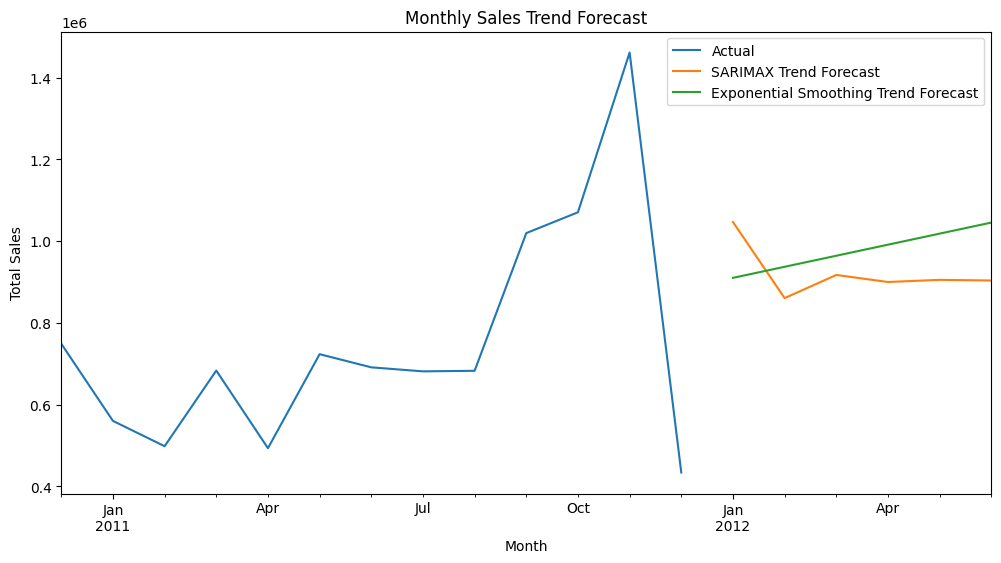

,SARIMAX Trend,Exponential Smoothing Trend
2012-01-01,1.047047e+06,9.101817e+05
2012-02-01,8.606053e+05,9.372439e+05
2012-03-01,9.172759e+05,9.643060e+05
2012-04-01,9.000504e+05,9.913681e+05
2012-05-01,9.052862e+05,1.018430e+06
2012-06-01,9.036947e+05,1.045492e+06


In [15]:
# Fitting the SARIMAX and Exponential Smoothing models without explicit decomposition
sarimax_trend_model = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
sarimax_trend_result = sarimax_trend_model.fit()

exp_smooth_trend_model = ExponentialSmoothing(monthly_sales, trend='add', seasonal=None)
exp_smooth_trend_result = exp_smooth_trend_model.fit()

# Forecasting the next 6 months
sarimax_trend_forecast = sarimax_trend_result.forecast(steps=6)
exp_smooth_trend_forecast = exp_smooth_trend_result.forecast(steps=6)

# Plotting the trend forecasts
plt.figure(figsize=(12, 6))
monthly_sales.plot(label='Actual', legend=True)
sarimax_trend_forecast.plot(label='SARIMAX Trend Forecast', legend=True)
exp_smooth_trend_forecast.plot(label='Exponential Smoothing Trend Forecast', legend=True)
plt.title('Monthly Sales Trend Forecast')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()

# Display the forecasted trend values
forecasted_trend_values = pd.DataFrame({
    'SARIMAX Trend': sarimax_trend_forecast,
    'Exponential Smoothing Trend': exp_smooth_trend_forecast
})
forecasted_trend_values.head(6)  # Displaying forecasts for the next 6 months
 # Displaying forecasts for the next 6 months
